In [1]:
import pandas as pd

# Load the dataset
file_path = "WA_Fn-UseC_-Sales-Win-Loss (1).csv"
df = pd.read_csv(file_path)

# Display basic info and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Opportunity Number                       78025 non-null  int64  
 1   Supplies Subgroup                        78025 non-null  object 
 2   Supplies Group                           78025 non-null  object 
 3   Region                                   78025 non-null  object 
 4   Route To Market                          78025 non-null  object 
 5   Elapsed Days In Sales Stage              78025 non-null  int64  
 6   Opportunity Result                       78025 non-null  object 
 7   Sales Stage Change Count                 78025 non-null  int64  
 8   Total Days Identified Through Closing    78025 non-null  int64  
 9   Total Days Identified Through Qualified  78025 non-null  int64  
 10  Opportunity Amount USD                   78025

(None,
    Opportunity Number     Supplies Subgroup          Supplies Group  \
 0             1641984  Exterior Accessories         Car Accessories   
 1             1658010  Exterior Accessories         Car Accessories   
 2             1674737      Motorcycle Parts  Performance & Non-auto   
 3             1675224         Shelters & RV  Performance & Non-auto   
 4             1689785  Exterior Accessories         Car Accessories   
 
       Region Route To Market  Elapsed Days In Sales Stage Opportunity Result  \
 0  Northwest    Fields Sales                           76                Won   
 1    Pacific        Reseller                           63               Loss   
 2    Pacific        Reseller                           24                Won   
 3    Midwest        Reseller                           16               Loss   
 4    Pacific        Reseller                           69               Loss   
 
    Sales Stage Change Count  Total Days Identified Through Closing  \


In [2]:
df.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


In [3]:
#checking null values
df.isnull().sum()

Opportunity Number                            0
Supplies Subgroup                             0
Supplies Group                                0
Region                                        0
Route To Market                               0
Elapsed Days In Sales Stage                   0
Opportunity Result                            0
Sales Stage Change Count                      0
Total Days Identified Through Closing         0
Total Days Identified Through Qualified       0
Opportunity Amount USD                        0
Client Size By Revenue                        0
Client Size By Employee Count                 0
Revenue From Client Past Two Years            0
Competitor Type                            9257
Ratio Days Identified To Total Days           0
Ratio Days Validated To Total Days            0
Ratio Days Qualified To Total Days            0
Deal Size Category                            0
dtype: int64

In [4]:
#Preprocess the data 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop unique identifier
df = df.drop(columns=["Opportunity Number"])

# Encode target: 'Won' as 1, 'Loss' as 0
df["Opportunity Result"] = df["Opportunity Result"].map({"Won": 1, "Loss": 0})

# Separate features and target
X = df.drop(columns=["Opportunity Result"])
y = df["Opportunity Result"]

# Encode categorical features
categorical_cols = X.select_dtypes(include=["object"]).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8263


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
!pip install xgboost


In [7]:
#TRAIN XGBOOST Model 

from xgboost import XGBClassifier

# Train model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:49:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [8]:
!pip install --upgrade xgboost shap



/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [14:49:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


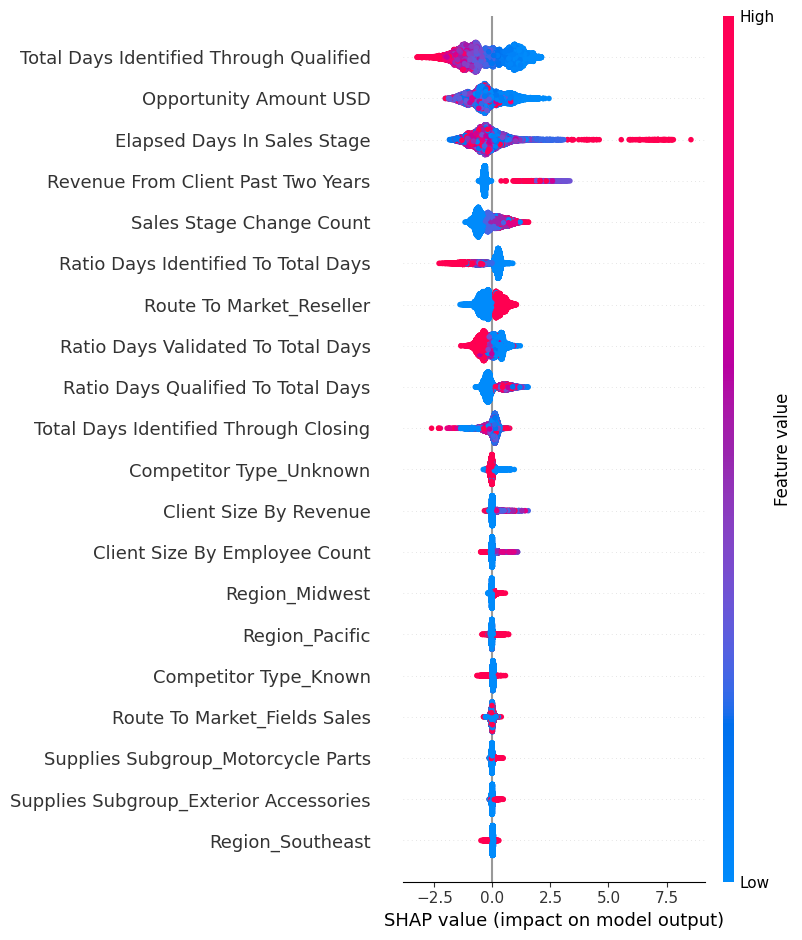

In [9]:
import shap
import matplotlib.pyplot as plt  
from xgboost import XGBClassifier

# Retrain model to ensure clean state
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Use TreeExplainer
explainer = shap.TreeExplainer(model)

# Get SHAP values
shap_values = explainer.shap_values(X_test)

# Plot summary
shap.summary_plot(shap_values, X_test)

#Save plot
plt.savefig("shap_summary_plot.png", bbox_inches='tight')  # Save to file
plt.close()

In [10]:
X_test.columns.tolist()



['Elapsed Days In Sales Stage',
 'Sales Stage Change Count',
 'Total Days Identified Through Closing',
 'Total Days Identified Through Qualified',
 'Opportunity Amount USD',
 'Client Size By Revenue',
 'Client Size By Employee Count',
 'Revenue From Client Past Two Years',
 'Ratio Days Identified To Total Days',
 'Ratio Days Validated To Total Days',
 'Ratio Days Qualified To Total Days',
 'Deal Size Category',
 'Supplies Subgroup_Batteries & Accessories',
 'Supplies Subgroup_Car Electronics',
 'Supplies Subgroup_Exterior Accessories',
 'Supplies Subgroup_Garage & Car Care',
 'Supplies Subgroup_Interior Accessories',
 'Supplies Subgroup_Motorcycle Parts',
 'Supplies Subgroup_Performance Parts',
 'Supplies Subgroup_Replacement Parts',
 'Supplies Subgroup_Shelters & RV',
 'Supplies Subgroup_Tires & Wheels',
 'Supplies Subgroup_Towing & Hitches',
 'Supplies Group_Car Accessories',
 'Supplies Group_Car Electronics',
 'Supplies Group_Performance & Non-auto',
 'Supplies Group_Tires & Wheels'

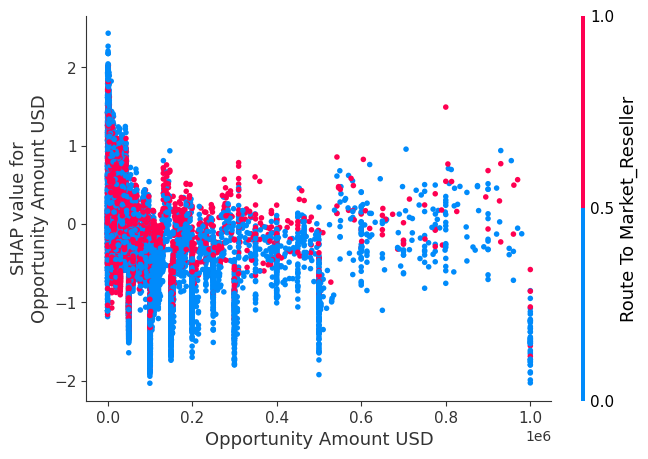

In [11]:
shap.dependence_plot('Opportunity Amount USD', shap_values, X_test)



In [12]:
# shap.initjs()  # for JS-based plots
# shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


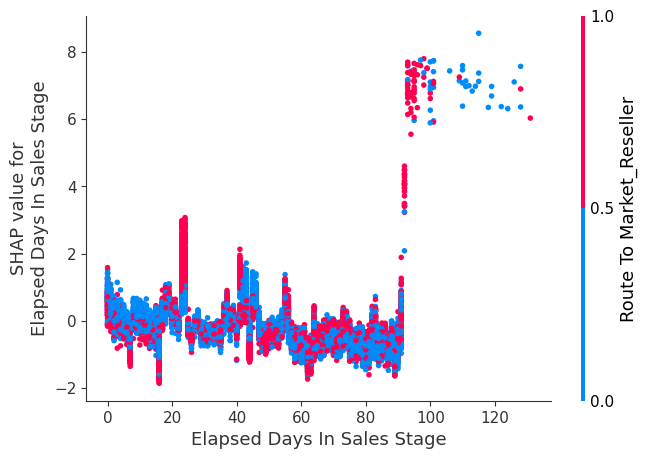

In [13]:
shap.dependence_plot('Elapsed Days In Sales Stage', shap_values, X_test)


In [14]:
import numpy as np

# Get mean absolute SHAP value for each feature
mean_abs_shap = np.abs(shap_values).mean(axis=0)
top_features = X_test.columns[np.argsort(mean_abs_shap)[-10:][::-1]]
print(top_features)


Index(['Total Days Identified Through Qualified', 'Opportunity Amount USD',
       'Elapsed Days In Sales Stage', 'Revenue From Client Past Two Years',
       'Sales Stage Change Count', 'Ratio Days Identified To Total Days',
       'Route To Market_Reseller', 'Ratio Days Validated To Total Days',
       'Ratio Days Qualified To Total Days',
       'Total Days Identified Through Closing'],
      dtype='object')


In [15]:
#Plot dependance of top 5 features 
import numpy as np

# Get top 5 features by mean SHAP value
mean_abs_shap = np.abs(shap_values).mean(axis=0)
top_features = X_test.columns[np.argsort(mean_abs_shap)[-5:][::-1]]
print("Top 5 SHAP features:", top_features)


Top 5 SHAP features: Index(['Total Days Identified Through Qualified', 'Opportunity Amount USD',
       'Elapsed Days In Sales Stage', 'Revenue From Client Past Two Years',
       'Sales Stage Change Count'],
      dtype='object')


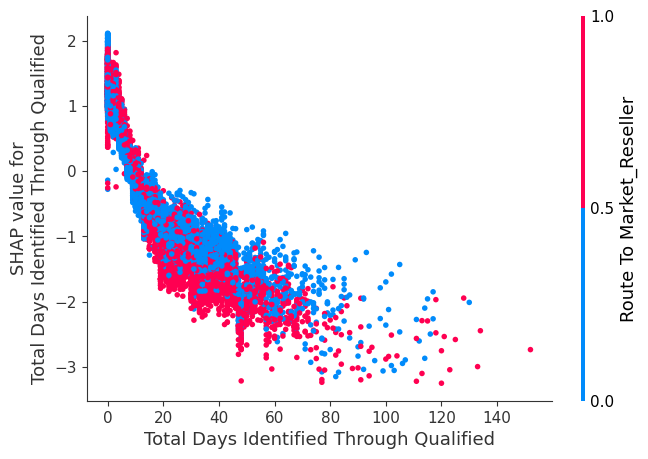

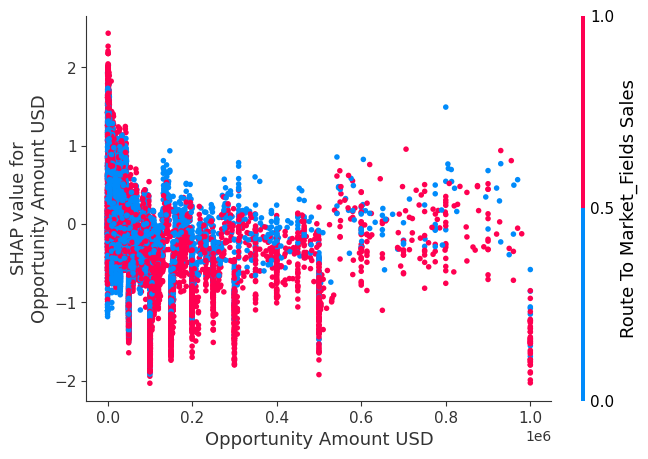

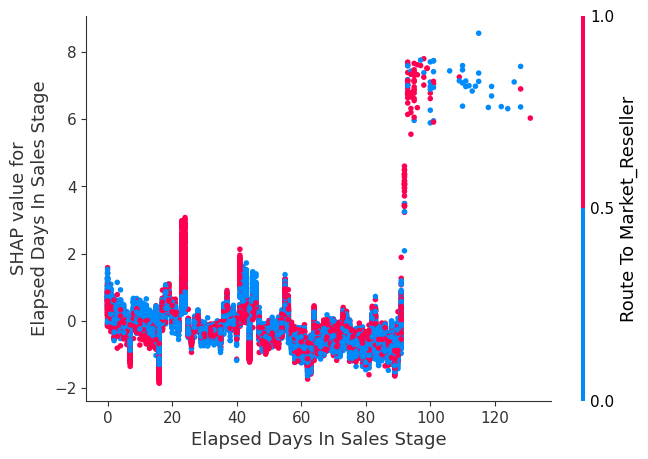

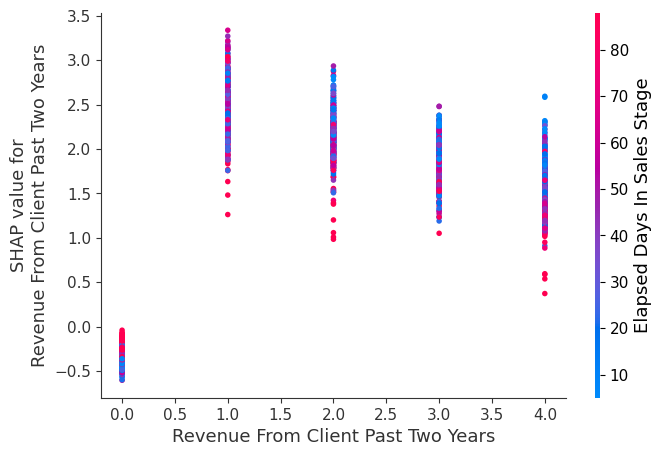

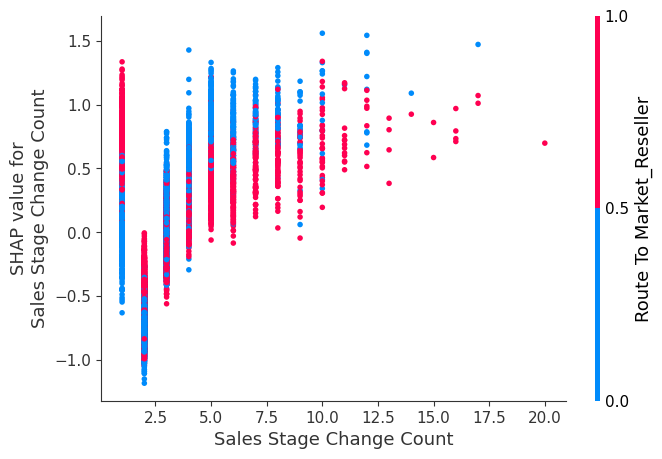

In [16]:
#plot dependance for each 
for feature in top_features:
    shap.dependence_plot(feature, shap_values, X_test)


In [17]:
#explain individual prediction - why it's win or loss?
# SHAP force plot for 0th test sample
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])


In [18]:
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)
shap_df.to_csv("shap_values.csv", index=False)
